# Making Plots from data 
## and comparing with data from standard simulation packages

In [1]:
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.24/00


In [2]:
import os
data_path = "./data_test"

# load MC data
Michel_Samples = np.load(os.path.join(data_path,"01_michel_samples.npy")) 
four_momenta_mu_frame = np.load(os.path.join(data_path,"02_four_momenta_MRF.npy"))
four_momenta_LAB = np.load(os.path.join(data_path,"03_four_momenta_LAB.npy"))

# 1.0 Michel Spectrum : toyMC vs theoretical calculations

taken from: IntroductoryMuonScience-Nagamine p.12

all the following equations are for decay positrion,

$${E_e}^2(3E_m-2E_e)[1-A(E_e)\cos \theta] $$

$$A(E_e) = \frac{E_m - 2E_e}{3E_m-2E_e}$$

$$\propto x^2[(3-2x)-(1-2x)\cos \theta]$$

integrated over all $\theta$ :

$$\propto x^2 ( 3-2x)$$

# 1.1 distribution over $x$ and $\theta$

In [3]:
# theoretical calculation
x = np.zeros(shape=(2,100))
x[0]=np.linspace(0.0,1.0,100) # exclude the endpoint to prevent integral blows up !

y = lambda x:(3-2*x)*x*x # IntroductoryMuonScience-Nagamine p.12
x[1] = y(x[0])
x[1] = x[1]/np.mean(x[1]) # dividing a distribution with its mean is p.d.f

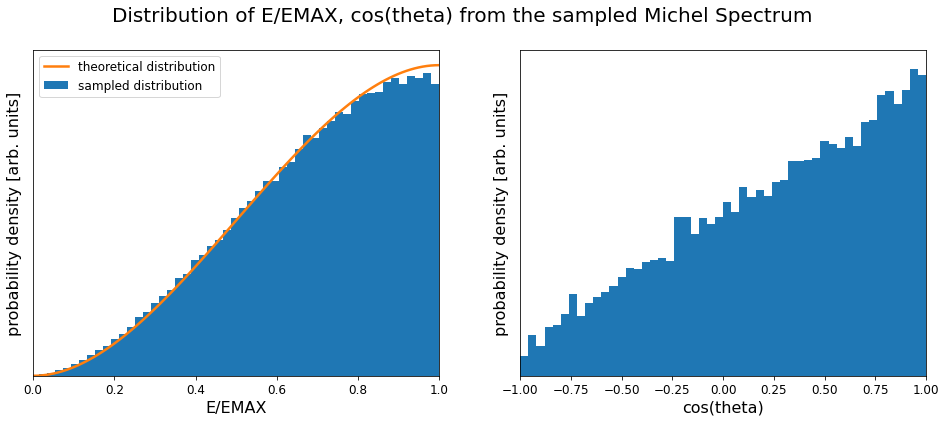

In [4]:
plt.rcParams['text.usetex'] = False # enable latex rendering
fig = plt.figure(figsize=(16,6))
fig.suptitle('Distribution of E/EMAX, cos(theta) from the sampled Michel Spectrum ', fontsize=20)

ax1 = fig.add_subplot(1,2,1)
ax1.hist(Michel_Samples[:,0],bins=50,density=True, stacked=True,label='sampled distribution') # density:normalized
ax1.plot(x[0],x[1],linewidth=2.5,label='theoretical distribution')
ax1.set_xlim([0,1])
ax1.set_yticklabels([])
ax1.set_xlabel('E/EMAX',fontsize=16)
ax1.set_ylabel("probability density [arb. units]",fontsize=16)
ax1.tick_params(axis='y', left=False)
ax1.tick_params(axis='x', labelsize=12)
ax1.legend(fontsize=12)

ax2 = fig.add_subplot(1,2,2)
ax2.hist(Michel_Samples[:,1],bins=50,density=True)
ax2.set_xlim([-1,1])
ax2.set_ylim([0.3,0.7])
ax2.set_yticklabels([])
ax2.set_xlabel('cos(theta)',fontsize=16)
ax2.set_ylabel("probability density [arb. units]",fontsize=16)
ax2.tick_params(axis='y', left=False)
ax2.tick_params(axis='x', labelsize=12)

fname = os.path.join(data_path,"fig1.1_michel_01.png")
plt.savefig(fname)

# 1.2 Michel spectrum for $\theta$ = 0 , 90 ,180

In [5]:
michel_cut_ctheta1 = Michel_Samples[abs(Michel_Samples[:,1]-1)<=0.5] # ctheta= 1
michel_cut_ctheta0 = Michel_Samples[abs(Michel_Samples[:,1])<=0.5]   # ctheta= 0
michel_cut_ctheta_1 = Michel_Samples[abs(Michel_Samples[:,1]+1)<=0.5] # ctheta= -1

# compare with theoretical calculation
x = np.zeros(shape=(5,100))
x[0]=np.linspace(0.0,1.0,100) # exclude the endpoint to prevent integral blows up !

y2 = lambda x,ctheta: x*x*((3-2*x)-(1-2*x)*ctheta) # IntroductoryMuonScience-Nagamine fig1.6 full formula
x[1] = y2(x[0],1)
x[1] = x[1]/np.mean(x[1]) 

x[2] = y2(x[0],0)
x[2] = x[2]/np.mean(x[2]) 

x[3] = y2(x[0],-1)
x[3] = x[3]/np.mean(x[3]) 

y1 = lambda x:(3-2*x)*x*x # IntroductoryMuonScience-Nagamine p.12
x[4] = y1(x[0])
x[4] = x[4]/np.mean(x[4]) 

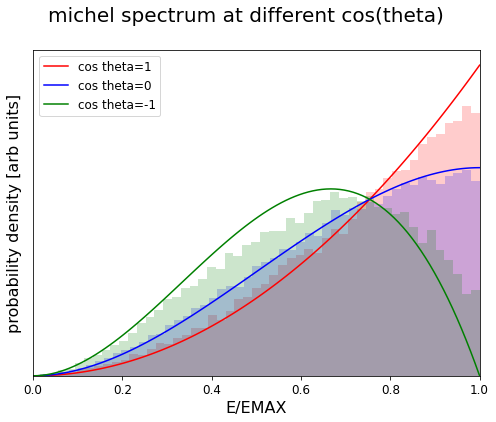

In [6]:
plt.rcParams['text.usetex'] = False # enable latex rendering
fig = plt.figure(figsize=(8,6))
fig.suptitle('michel spectrum at different cos(theta) ', fontsize=20)

ax1 = fig.add_subplot(1,1,1)
ax1.hist(michel_cut_ctheta1[:,0],bins=50,density=True, alpha=0.2,color='red')
ax1.plot(x[0],x[1],color='red',label='cos theta=1')

ax1.hist(michel_cut_ctheta0[:,0],bins=50,density=True, alpha=0.2,color='blue')
ax1.plot(x[0],x[2],color='blue',label='cos theta=0')

ax1.hist(michel_cut_ctheta_1[:,0],bins=50,density=True, alpha=0.2,color='green')
ax1.plot(x[0],x[3],color='green',label='cos theta=-1')

ax1.legend(fontsize=12)
ax1.set_xlim([0,1])
ax1.set_xlabel('E/EMAX',fontsize=16)
ax1.set_ylabel("probability density [arb units]",fontsize=16)
ax1.set_yticklabels([])
ax1.tick_params(axis='y', left=False)
ax1.tick_params(axis='x', labelsize=12)

fname = os.path.join(data_path,"fig1.2_michel_02ctheta.png")
plt.savefig(fname)

# 2.1 E, PX, PY ,PZ (in MRF): toyMC vs musrSim

In [7]:
# load musrSim data
df = r.RDataFrame("t1",'../sanity_data/musr_10Mv2.root')
df = df.Define("posiInitE","sqrt(posIniMomX*posIniMomX + posIniMomY*posIniMomY + posIniMomZ*posIniMomZ - 0.511*0.511)")
musrSim_dict = df.AsNumpy()

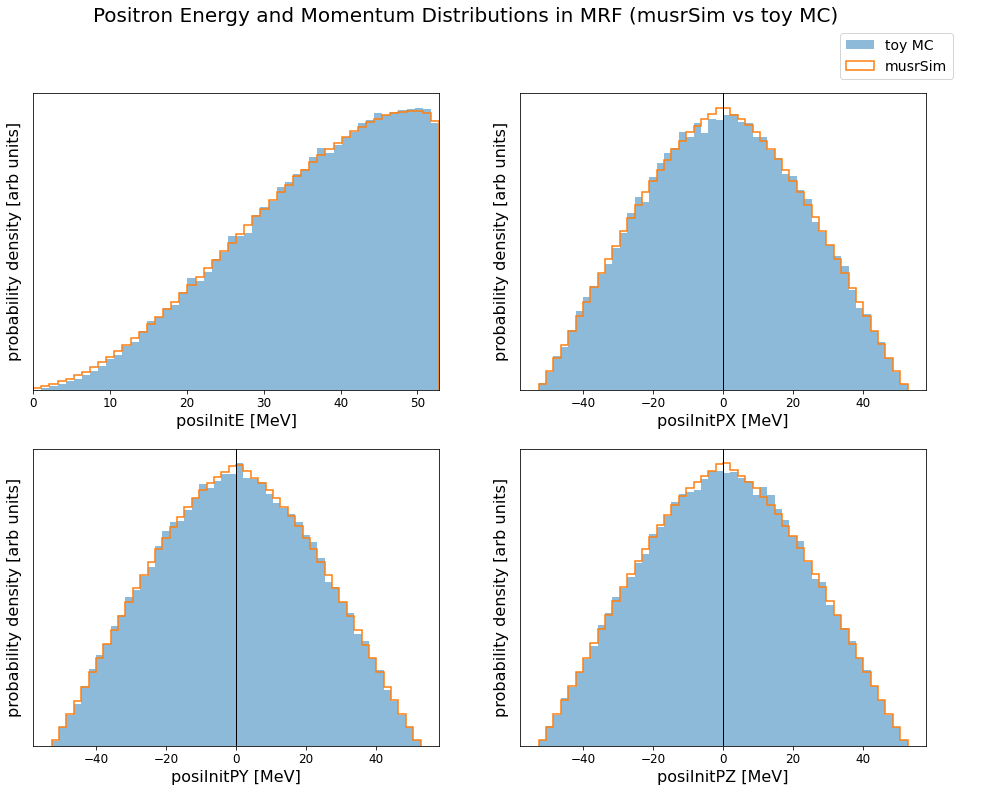

In [8]:
# make a plot to compare with the toy MC data
fig = plt.figure(figsize=(16,12))
fig.suptitle('Positron Energy and Momentum Distributions in MRF (musrSim vs toy MC)', fontsize=20)

ax1 = fig.add_subplot(2,2,1)
ax1.hist(four_momenta_mu_frame[:,0],range=(0,52.8),bins=50,density=True,alpha=0.5,label='toy MC')
ax1.hist(musrSim_dict['posiInitE'],range=(0,52.8),bins=50,density=True,histtype='step',linewidth=1.5,label='musrSim')
ax1.set_xlim([0,52.8])
ax1.set_yticklabels([])
ax1.tick_params(axis='y', left=False)
ax1.tick_params(axis='x', labelsize=12)
ax1.set_xlabel('posiInitE [MeV]',fontsize=16)
ax1.set_ylabel("probability density [arb units]",fontsize=16)


ax2 = fig.add_subplot(2,2,2)
ax2.hist(four_momenta_mu_frame[:,1],range=(-52.8,52.8),bins=50,density=True,alpha=0.5)
ax2.hist(musrSim_dict['posIniMomX'],range=(-52.8,52.8),bins=50,density=True,histtype='step',linewidth=1.5)
ax2.axvline(color='black', lw=1.0)
ax2.set_yticklabels([])
ax2.tick_params(axis='y', left=False)
ax2.tick_params(axis='x', labelsize=12)
ax2.set_xlabel('posiInitPX [MeV]',fontsize=16)
ax2.set_ylabel("probability density [arb units]",fontsize=16)


ax3 = fig.add_subplot(2,2,3)
ax3.hist(four_momenta_mu_frame[:,2],range=(-52.8,52.8),bins=50,density=True,alpha=0.5)
ax3.hist(musrSim_dict['posIniMomY'],range=(-52.8,52.8),bins=50,density=True,histtype='step',linewidth=1.5)
ax3.axvline(color='black', lw=1.0)
ax3.set_yticklabels([])
ax3.tick_params(axis='y', left=False)
ax3.tick_params(axis='x', labelsize=12)
ax3.set_xlabel('posiInitPY [MeV]',fontsize=16)
ax3.set_ylabel("probability density [arb units]",fontsize=16)


ax4 = fig.add_subplot(2,2,4)
ax4.hist(four_momenta_mu_frame[:,3],range=(-52.8,52.8),bins=50,density=True,alpha=0.5)
ax4.hist(musrSim_dict['posIniMomZ'],range=(-52.8,52.8),bins=50,density=True,histtype='step',linewidth=1.5)
ax4.axvline(color='black', lw=1.0)
ax4.set_yticklabels([])
ax4.tick_params(axis='y', left=False)
ax4.tick_params(axis='x', labelsize=12)
ax4.set_xlabel('posiInitPZ [MeV]',fontsize=16)
ax4.set_ylabel("probability density [arb units]",fontsize=16)


fig.legend(loc=(0.85,0.9),fontsize=14)

fname = os.path.join(data_path,"fig2.1_mrf.png")
plt.savefig(fname)

# 3.1 posiInitE, posiInitPX, posiInitPY, posiInitPZ: toyMC vs gm2ringsim

In [9]:
r.gInterpreter.Declare("""
//#include <math.h>

double Phase(double y1, double x1, double y2, double x2) {
   /* compute the angle difference between vector1 and vector2 given their x,y components. */
   
   double ans1 = atan2(y1,x1);  //angle of vector 1, muDecayP
   double ans2 = atan2(y2,x2);  //angle of vector 2, muDecayPol
   double ans = ans1 - ans2;
   
   if(ans<0){
       ans = ans+2*M_PI;
    }
       
   return ans;
}
""")

# load gm2ringsim data
fname = "/home/junkai.ng/junkai.ng/CaloMC/gm2ringsim_muon_gasgun_ana_21378178_1.root"
df = r.RDataFrame("G2PhaseAnalyzer/g2phase",fname)
df = df.Define("g2phase", "Phase(muDecayPX,muDecayPZ,muDecayPolX,muDecayPolZ)") 
df = df.Define("cosg2phase", "cos(g2phase)") 
varList = ["posiInitE","posiInitPX","posiInitPY","posiInitPZ","g2phase","cosg2phase"]
data_gm2ringsim = df.AsNumpy(columns=varList)

ReadStreamerInfo, class:string, illegal uid=-2


Warning in <TClass::Init>: no dictionary for class __basic_string_common<true> is available


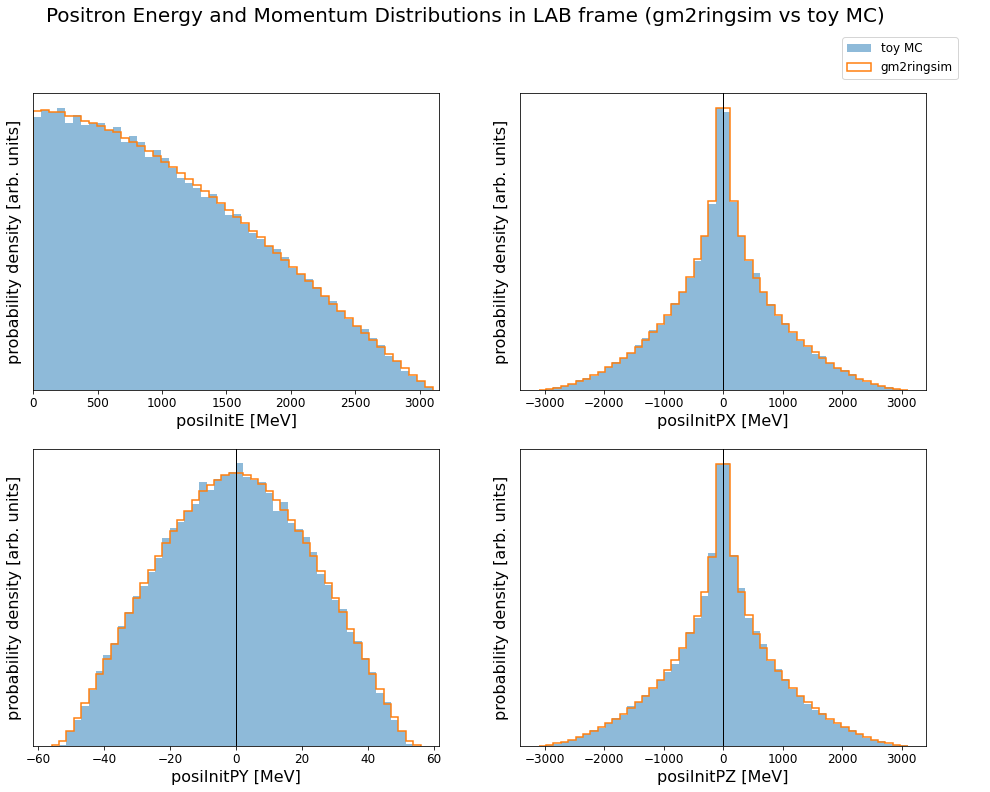

In [10]:
# make a plot to compare with the toy MC data
fig = plt.figure(figsize=(16,12))
fig.suptitle('Positron Energy and Momentum Distributions in LAB frame (gm2ringsim vs toy MC)', fontsize=20)

ax1 = fig.add_subplot(2,2,1)
ax1.hist(four_momenta_LAB[:,0],range=(0,3100),bins=50,density=True,alpha=0.5,label='toy MC')
ax1.hist(data_gm2ringsim['posiInitE'],range=(0,3100),density=True,bins=50,histtype='step',linewidth=1.5,label='gm2ringsim')
ax1.set_xlim([0,3150])
ax1.set_xlabel('posiInitE [MeV]',fontsize=16)
ax1.set_ylabel("probability density [arb. units]",fontsize=16)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', left=False)
ax1.set_yticklabels([])

ax2 = fig.add_subplot(2,2,2)
ax2.hist(four_momenta_LAB[:,1],range=(-3100,3100),bins=50,density=True,alpha=0.5)
ax2.hist(data_gm2ringsim['posiInitPX'],range=(-3100,3100),bins=50,density=True,histtype='step',linewidth=1.5)
ax2.axvline(color='black', lw=1.0)
ax2.set_xlabel('posiInitPX [MeV]',fontsize=16)
ax2.set_ylabel("probability density [arb. units]",fontsize=16)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', left=False)
ax2.set_yticklabels([])

ax3 = fig.add_subplot(2,2,3)
ax3.hist(four_momenta_LAB[:,2],range=(-56,56),bins=50,density=True,alpha=0.5)
ax3.hist(data_gm2ringsim['posiInitPY'],range=(-56,56),bins=50,density=True,histtype='step',linewidth=1.5)
ax3.axvline(color='black', lw=1.0)
ax3.set_xlabel('posiInitPY [MeV]',fontsize=16)
ax3.set_ylabel("probability density [arb. units]",fontsize=16)
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', left=False)
ax3.set_yticklabels([])

ax4 = fig.add_subplot(2,2,4)
ax4.hist(four_momenta_LAB[:,3],range=(-3100,3100),bins=50,density=True,alpha=0.5)
ax4.hist(data_gm2ringsim['posiInitPZ'],range=(-3100,3100),bins=50,density=True,histtype='step',linewidth=1.5)
ax4.axvline(color='black', lw=1.0)
ax4.set_xlabel('posiInitPZ [MeV]',fontsize=16)
ax4.set_ylabel("probability density [arb. units]",fontsize=16)
ax4.tick_params(axis='x', labelsize=12)
ax4.tick_params(axis='y', left=False)
ax4.set_yticklabels([])


fig.legend(loc=(0.85,0.9),fontsize=12)

fname = os.path.join(data_path,"fig3.1_lab.png")
plt.savefig(fname)

# 3.2 posiInitE distribution at different g2 phases

In [11]:
# sort out data at different cos(g2phase), for sampled data
filter1 = np.where(abs(four_momenta_LAB[:,11]-1)<=0.4 ) # ctheta= 1
filter2 = np.where(abs(four_momenta_LAB[:,11])<=0.4 )   # ctheta= 0
filter3 = np.where(abs(four_momenta_LAB[:,11]+1)<=0.4 ) # ctheta= -1

four_momenta_lab_filter_1 = four_momenta_LAB[filter1]
four_momenta_lab_filter_2 = four_momenta_LAB[filter2]
four_momenta_lab_filter_3 = four_momenta_LAB[filter3]

In [12]:
# sort out data at different cos(g2phase), for gm2ringsim data
data_gm2ringsim_partial = np.zeros(shape=(2,data_gm2ringsim["posiInitE"].size))
data_gm2ringsim_partial[0] = data_gm2ringsim["posiInitE"]
data_gm2ringsim_partial[1] = data_gm2ringsim["cosg2phase"]
data_gm2ringsim_partial = data_gm2ringsim_partial.T

filter1 = np.where(abs(data_gm2ringsim_partial[:,1]-1)<=0.4 ) # ctheta= 1, theta=0
filter2 = np.where(abs(data_gm2ringsim_partial[:,1])<=0.4 )   # ctheta= 0, theta=90
filter3 = np.where(abs(data_gm2ringsim_partial[:,1]+1)<=0.4 ) # ctheta= -1, theta=180

data_gm2ringsim_partial_filter_1 = data_gm2ringsim_partial[filter1]
data_gm2ringsim_partial_filter_2 = data_gm2ringsim_partial[filter2]
data_gm2ringsim_partial_filter_3 = data_gm2ringsim_partial[filter3]

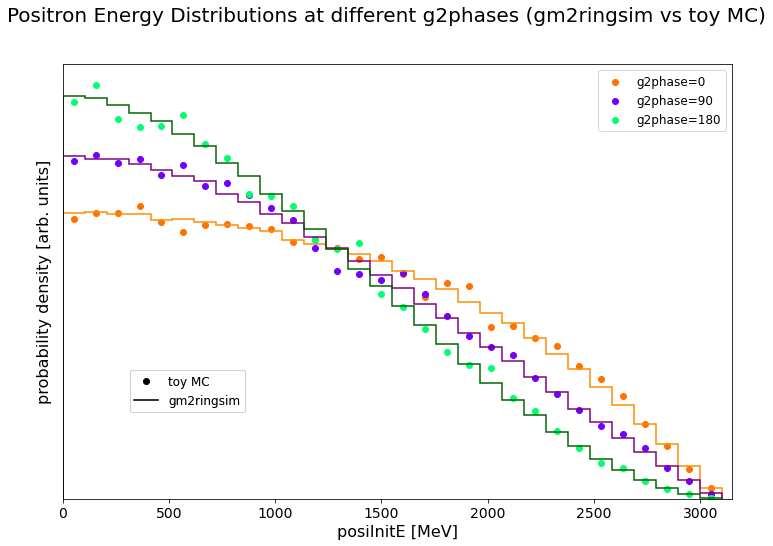

In [13]:
# make a plot to compare with the toy MC data
fig = plt.figure(figsize=(12,8))
fig.suptitle('Positron Energy Distributions at different g2phases (gm2ringsim vs toy MC)', fontsize=20)

ax1 = fig.add_subplot(1,1,1)
ax1.hist(data_gm2ringsim_partial_filter_1[:,0],range=(-3100,3100),bins=60,density=True,color='darkorange',histtype='step',linewidth=1.5)
bin_counts,bin_edges = np.histogram(four_momenta_lab_filter_1[:,0],range=(-3100,3100),bins=60,density=True)
bin_midpt = [0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_counts))]
ax1.scatter(bin_midpt,bin_counts,c='#FF7200',label='g2phase=0')

ax1.hist(data_gm2ringsim_partial_filter_2[:,0],range=(-3100,3100),bins=60,density=True,color='purple',histtype='step',linewidth=1.5)
bin_counts,bin_edges = np.histogram(four_momenta_lab_filter_2[:,0],range=(-3100,3100),bins=60,density=True)
bin_midpt = [0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_counts))]
ax1.scatter(bin_midpt,bin_counts,c='#7200FF',label='g2phase=90')

ax1.hist(data_gm2ringsim_partial_filter_3[:,0],range=(-3100,3100),bins=60,density=True,color='darkgreen',histtype='step',linewidth=1.5)
bin_counts,bin_edges = np.histogram(four_momenta_lab_filter_3[:,0],range=(-3100,3100),bins=60,density=True)
bin_midpt = [0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_counts))]
ax1.scatter(bin_midpt,bin_counts,c='#00FF72',label='g2phase=180')


ax1.set_xlabel('posiInitE [MeV]',fontsize=16)
ax1.set_ylabel("probability density [arb. units]",fontsize=16)
ax1.set_xlim([0,3150])
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', left=False)
ax1.set_yticklabels([])

lgd1 = ax1.legend(fontsize=12)
ax1.add_artist(lgd1)

import matplotlib.lines as mlines
line1 = mlines.Line2D([], [],linewidth=0, color='black', marker='o', markersize=6, label='toy MC')
line2 = mlines.Line2D([], [],linewidth=1.5, color='black', markersize=8, label='gm2ringsim')
lgd2 = ax1.legend(handles=[line1,line2],fontsize=12,loc=(0.1,0.2))
ax1.add_artist(lgd2)

fname = os.path.join(data_path,"fig3.2_g2phases.png")
plt.savefig(fname)

# 3.3 Energy vs g2phase Distribution

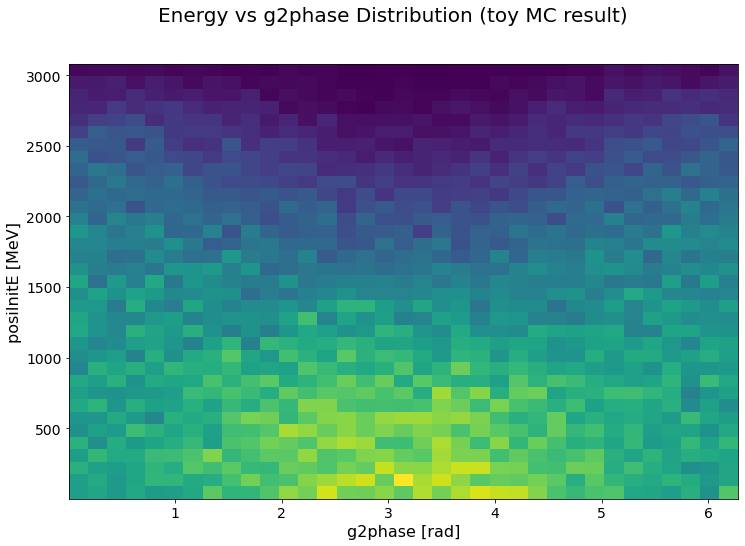

In [14]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Energy vs g2phase Distribution (toy MC result)', fontsize=20)

ax1 = fig.add_subplot(1,1,1)
ax1.hist2d(four_momenta_LAB[:,10],four_momenta_LAB[:,0],bins=(35,35),density=True,cmap='viridis')

ax1.set_xlabel('g2phase [rad]',fontsize=16)
ax1.set_ylabel("posiInitE [MeV]",fontsize=16)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

# fig.show()
fname = os.path.join(data_path,"fig3.3a_EvsPhase_mc.png")
plt.savefig(fname)

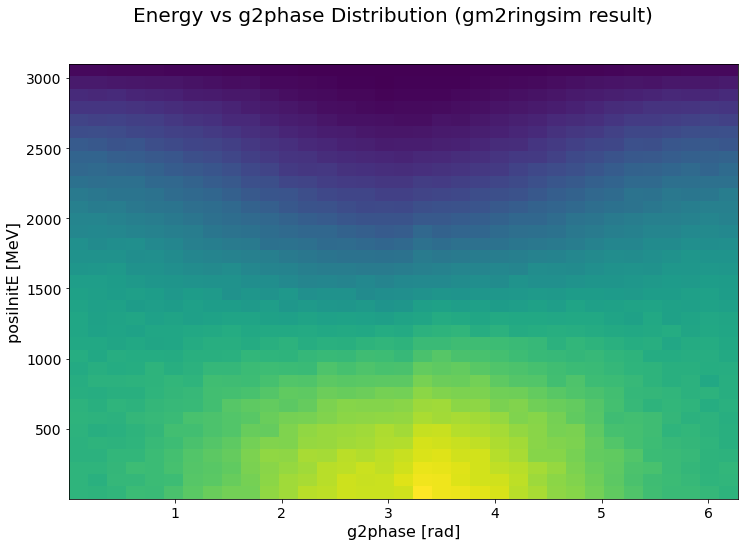

In [15]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Energy vs g2phase Distribution (gm2ringsim result)', fontsize=20)

ax1 = fig.add_subplot(1,1,1)
ax1.hist2d(data_gm2ringsim['g2phase'],data_gm2ringsim['posiInitE'],bins=(35,35),density=True,cmap='viridis')

ax1.set_xlabel('g2phase [rad]',fontsize=16)
ax1.set_ylabel("posiInitE [MeV]",fontsize=16)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

# fig.show()
fname = os.path.join(data_path,"fig3.3b_EvsPhase_gm2ringsim.png")
plt.savefig(fname)

# 4.0 positron energy distribution (MRF vs LAB) in toyMC: 

# 4.1 positron energy distribution (MRF vs LAB) in toyMC: 2d histogram

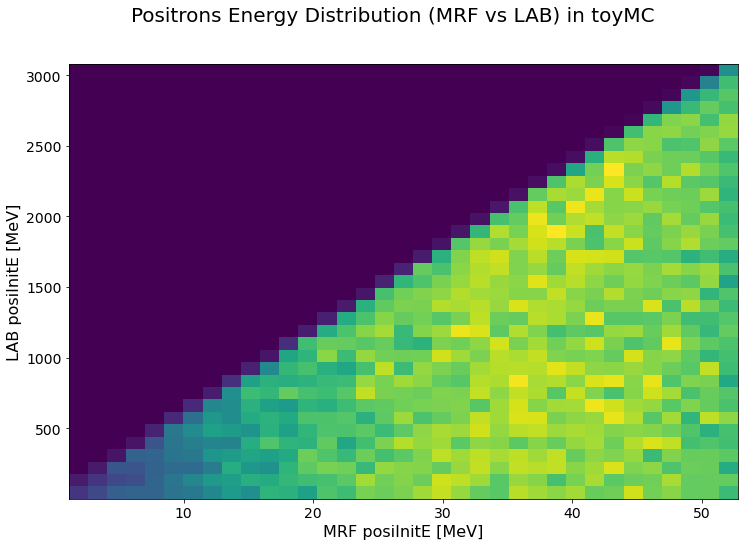

In [16]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Positrons Energy Distribution (MRF vs LAB) in toyMC', fontsize=20)

ax1 = fig.add_subplot(1,1,1)
ax1.hist2d(four_momenta_mu_frame[:,0],four_momenta_LAB[:,0],bins=(35,35),density=True,cmap='viridis')

ax1.set_xlabel('MRF posiInitE [MeV]',fontsize=16)
ax1.set_ylabel("LAB posiInitE [MeV]",fontsize=16)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

# fig.show()
fname = os.path.join(data_path,"fig4.1_E_mrf_vs_lab.png")
plt.savefig(fname)

# 4.2 positron energy distribution (LAB) in toyMC (with 1 MeV, 5 MeV, 10 MeV cut in MRF)

In [17]:
# sort out data at different MRF energy cut
filter4 = np.where(four_momenta_mu_frame[:,0]>=1 )
filter5 = np.where(four_momenta_mu_frame[:,0]>=5 )
filter6 = np.where(four_momenta_mu_frame[:,0]>=10 )

four_momenta_lab_filter_4 = four_momenta_LAB[filter4]
four_momenta_lab_filter_5 = four_momenta_LAB[filter5]
four_momenta_lab_filter_6 = four_momenta_LAB[filter6]

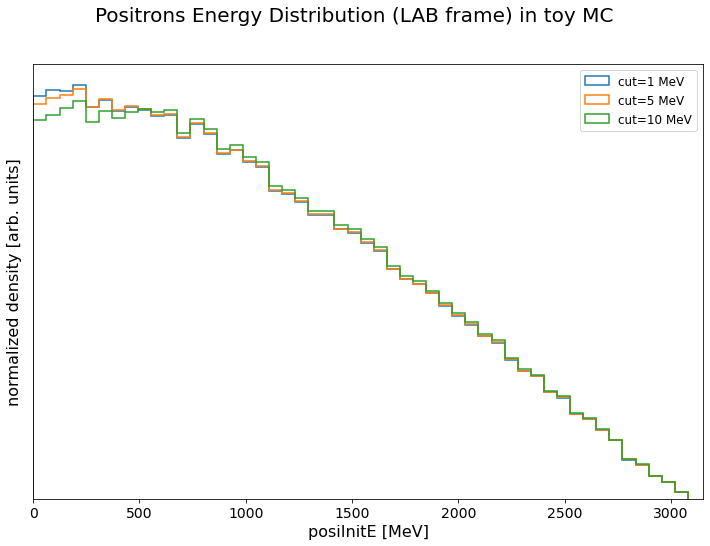

In [18]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Positrons Energy Distribution (LAB frame) in toy MC ', fontsize=20)

ax1 = fig.add_subplot(1,1,1)
ax1.hist(four_momenta_lab_filter_4[:,0],bins=50,density=True,histtype='step',linewidth=1.5,label='cut=1 MeV')
ax1.hist(four_momenta_lab_filter_5[:,0],bins=50,density=True,histtype='step',linewidth=1.5,label='cut=5 MeV')
ax1.hist(four_momenta_lab_filter_6[:,0],bins=50,density=True,histtype='step',linewidth=1.5,label='cut=10 MeV')

ax1.set_xlabel('posiInitE [MeV]',fontsize=16)
ax1.set_ylabel("normalized density [arb. units]",fontsize=16)
ax1.set_xlim([0,3150])
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', left=False)
ax1.set_yticklabels([])
ax1.legend(fontsize=12)

fname = os.path.join(data_path,"fig4.2_E_mrf_vs_lab_cut.png")
plt.savefig(fname)